# Guía 5 Problemas 10 y 11

*Por Gabriel Goren. L.U.:199/15. FCEN - UBA*

*Email: gabrielgoren@gmail.com*

---------------------------------------------------------------------

## Problema 10: Matriz de covarianza en un ajuste lineal por Cuadrados Mínimos

N mediciones $(x_i,y_i)$ con $y_i$ independientes y de idéntico error $\sigma$. Los parámetros de la recta $y = a_1 + a_2 x$ que mejor ajusta los datos se estiman según Cuadrados Mínimos, i.e. minimizando la suma $S_N = \Sigma_i^N [y_i - (a_1 + a_2 x_i)]^2$, obteniéndose

\begin{align*}
\hat{a}_1 &= (\Sigma x_i^2 \Sigma y_i - \Sigma x_i \Sigma x_i y_i) \:/ \Delta \\
\hat{a}_2 &= (N \Sigma x_i y_i - \Sigma x_i \Sigma y_i) \: / \Delta
\end{align*}

donde $\Delta = N \Sigma x_i^2 - (\Sigma x_i)^2$.


**(a)** Mostrar que 

$$ \newcommand{\Cov}{\mathrm{Cov}} \Cov(\hat{a}_1, \hat{a}_2) = \frac{\sigma^2}{\Delta} 
\left( \begin{array}{ccc}
\Sigma x_i^2 & - \Sigma x_i \\
-\Sigma x_i   & N \end{array} \right) $$

con $\Delta = N \Sigma x_i^2 - (\Sigma x_i)^2$.

Por la fórmula de aproximación lineal a la propagación de errores,

$$ \newcommand{\Var}{\mathrm{Var}}
\Var(\hat{a}_1) = \sum_i \sum_j \frac{\partial \hat{a}_1}{\partial y_i} \frac{\partial \hat{a}_1}{\partial y_j} \Cov(y_i,y_j).$$

En este caso se tiene que
\begin{align*}
\Cov(y_i,y_j) &= \delta_{ij} \sigma^2 \\
\frac{\partial \hat{a}_1}{\partial y_i} &= (\Sigma x_l^2 - x_i \Sigma x_l) \, / \Delta,
\end{align*}

luego

\begin{align*}
\Var(\hat{a}_1) &= \frac{\sigma^2}{\Delta^2} \sum_i \left( \Sigma x_l^2 - x_i \Sigma x_l \right)^2 \\
&= ... = \frac{\sigma^2}{\Delta^2} \left[ N (\Sigma x_l^2)^2 - \Sigma x_l^2 (\Sigma x_l)^2 \right] \\
&= \frac{\sigma^2}{\Delta^2} \: \Delta \Sigma x_i^2 \\
&= \frac{\sigma^2}{\Delta} \Sigma x_i^2.
\end{align*}

Por otro lado, dado que $\frac{\partial \hat{a}_2}{\partial y_i} = (N x_i - \Sigma x_l) \, / \Delta$,

\begin{align*}
\Var(\hat{a}_2) &= \frac{\sigma^2}{\Delta^2} \sum_i (N x_i - \Sigma x_l)^2 \\
&= ... = \frac{\sigma^2}{\Delta^2} \: \Delta N \\
&= \frac{\sigma^2}{\Delta} N.
\end{align*}

Finalmente, 

\begin{align*}
\Cov(\hat{a}_1, \hat{a}_2) &= \sum_i \sigma^2 \frac{\partial \hat{a}_1}{\partial y_i} \frac{\partial \hat{a}_2}{\partial y_i} \\
&= ... = \frac{\sigma^2}{\Delta^2} \left[ N \Sigma x_l^2 \Sigma x_l - N \Sigma x_l^2 \Sigma x_l - N \Sigma x_l \Sigma x_l^2 + \Sigma x_l (\Sigma x_l)^2 \right] \\
&= \frac{\sigma^2}{\Delta^2} \; (-\Delta \Sigma x_l) \\
&= \frac{\sigma^2}{\Delta} (- \Sigma x_i) = \Cov(\hat{a}_2, \hat{a}_1).
\end{align*}

**(b)** $\bar{x} > 0 \implies \rho < 0$ porque en tal caso, independientemente del signo de $\bar{y}$, se observa gráficamente que si la pendiente baja un poquito, debe aumentar la ordenada al origen y vicecersa. En cambio si $\bar{x} < 0$, si la pendiente baja un poquito, debe bajar también la pendiente. Esto es fácil de ver pensando que para distintos valores de ambos parámetros la recta debe seguir pasando por el punto $(\bar{x}, \bar{y})$. Si $\bar{x} = 0$ entonces al variar la pendiente usando $(\bar{x},\bar{y})$ como punto de pivote la ordenada al origen se mantiene constante.

**(c)** Usamos $\sigma = 0.3$ para realizar el ajuste sobre los datos que nos dan.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = [2.00 + 0.1 * i for i in range(11)]
Y = [2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99]
N = len(X)
sigma = 0.3

# Por comodidad (y eficiencia) defino ciertas sumatorias
SX = sum(X)
SY = sum(Y)
SSX = sum(x**2 for x in X) 
SXY = sum(x*y for (x,y) in zip(X,Y))

# La recta ajustada es y = a_1 + a_2 * x, con los siguientes valores
# para los parámetros:

Delta = N * SSX - SX**2
a_1 = (SSX * SY - SX * SXY) / Delta
a_2 = (N * SXY - SX * SY) / Delta

# La matriz de covarianza la defino directamente con un ndarray:
Cov = np.array([[SSX, -SX], [-SX, N]]) * sigma**2/Delta
sigma_1 = np.sqrt(Cov[0,0])
sigma_2 = np.sqrt(Cov[1,1])
ro  = Cov[0,1] / (sigma_1 * sigma_2)

print("La estimación de Cuadrados Mínimos de los parámetros de la recta es:\n a_1 = %.3g ± %.3g \n a_2 = %.3g ± %.3g \n ro = %.3g" % (a_1, sigma_1, a_2, sigma_2, ro))

La estimación de Cuadrados Mínimos de los parámetros de la recta es:
 a_1 = 1.45 ± 0.721 
 a_2 = 0.799 ± 0.286 
 ro = -0.992


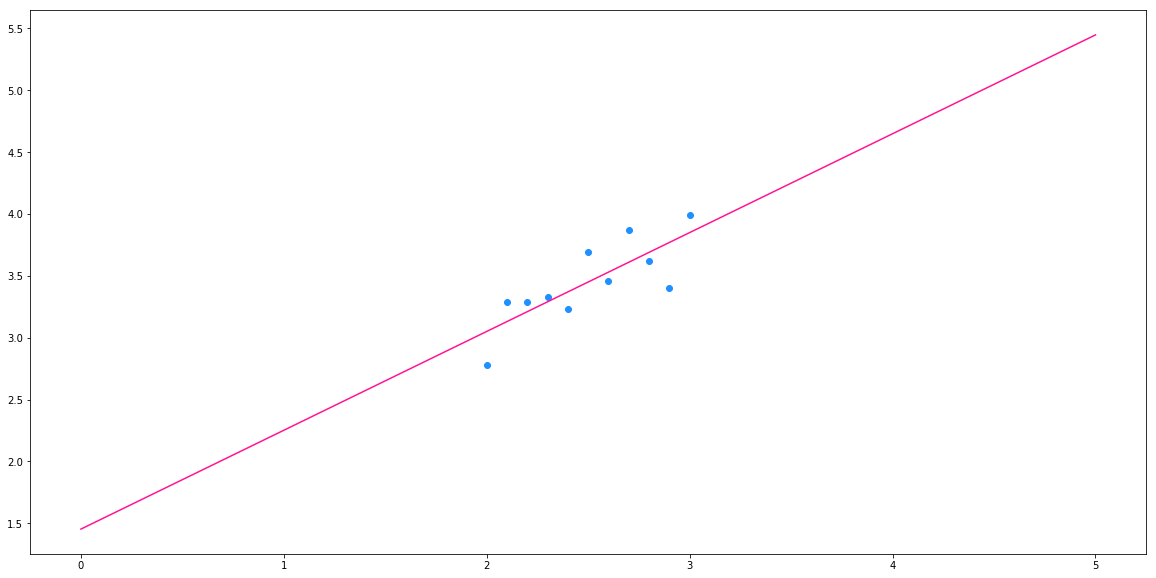

In [2]:
xs = np.linspace(0,5, num=1000)
recta = a_1 + a_2 * xs
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(X, Y, 'o', color='dodgerblue')
ax.plot(xs, recta, color='deeppink')

 **(d)** En este inciso agregamos la banda de error al gráfico.

Para empezar, calculamos la predicción $y_a$ para un cierto valor $x_a$ de la abcisa: como $\frac{\partial \hat{y}_a}{\partial \hat{a}_1} = 1$ y $\frac{\partial \hat{y}_a}{\partial \hat{a}_2} = x_a$,

$$ \hat{y}_a (x_a) = \hat{a}_1 + \hat{a}_2 \,x_a $$
\begin{align*}
\Var(\hat{y}_a) &= 
\sum_i \sum_j \frac{\partial \hat{y}_a}{\partial \hat{a}_i}
              \frac{\partial \hat{y}_a}{\partial \hat{a}_j}
              \Cov(\hat{a}_i, \hat{a}_j) \\
&= \frac{\sigma^2}{\Delta} \left( \Sigma x_i^2 - 2 x_a \Sigma x_i + x_a^2 N \right)
\end{align*}

Además, $\Var(\hat{y}_a)$ es cuadrático en $x_a$ y por lo tanto su único punto crítico es un mínimo global. Luego, $x_a^*$ tal que minimiza esta varianza está dado por 

$$ \frac{\partial \Var(\hat{y}_a)}{\partial x_a} \bigg|_{x_a^*} = \frac{\sigma^2}{\Delta} (-2 \Sigma x_i + 2 x_a^* N) = 0 $$

$$ \implies x_a^* = \bar{x} = \frac{1}{N} \sum_i x_i $$

Evaluando el error de $\hat{y}_a$ allí, obtenemos $\Var(\hat{y}_a) = \frac{\sigma^2}{N}$. Es decir, obtenemos una estimación para $y(\bar{x})$ cuya dispersión estándar es $\frac{\sigma^2}{N}$. Esta es la misma dispersión que la del estadístico $\bar{y} = \frac{1}{N} \Sigma y_i$ (pues $\Var(\bar{y}) = \frac{1}{N^2} \Sigma \Var(y_i) = \frac{N \sigma^2}{N^2} = \frac{\sigma^2}{N}$). Esto es razonable pues en efecto

$$
\newcommand{\E}{\mathrm{E}}
y(\bar{x}) = \frac{1}{N} y(\Sigma x_i) = \frac{1}{N} \sum y(x_i) = \frac{1}{N} \sum \E[y_i] = \E[\bar{y}] $$

debido a que tanto $y(x)$ como la esperanza son lineales. Es decir que $\bar{y}$ también estima a $y(\bar{x})$.

Esto se puede interpretar del siguiente modo: el ajuste lineal por cuadrados mínimos nos da una estimación para $y(\bar{x})$ que coincide con su estimación más sencilla y directa mediante el cálculo de $\bar{y}$. Sin embargo, el método va más allá y extrae de los datos más información, permitiendo estimar los valores $y(x_a)$ para $x_a$ distintos del promedio. Esta estimación será más precisa mientras más cercano sea $x_a$ a $\bar{x}$. Visto desde este punto de vista, en el cual no interesan los valores estimados para $a_1$ y $a_2$ sino solo la capacidad de predicción de valores de la función $y$, el ajuste lineal resulta una "extensión" de la estimación de $y$ evaluada en $\bar{x}$ a $y$ evaluada en otros valores de $x$, que se hace arbitrariamente mala a medida que nos alejamos de $x$.

Observemos esto visualmente agregando la banda de error al gráfico del ajuste:

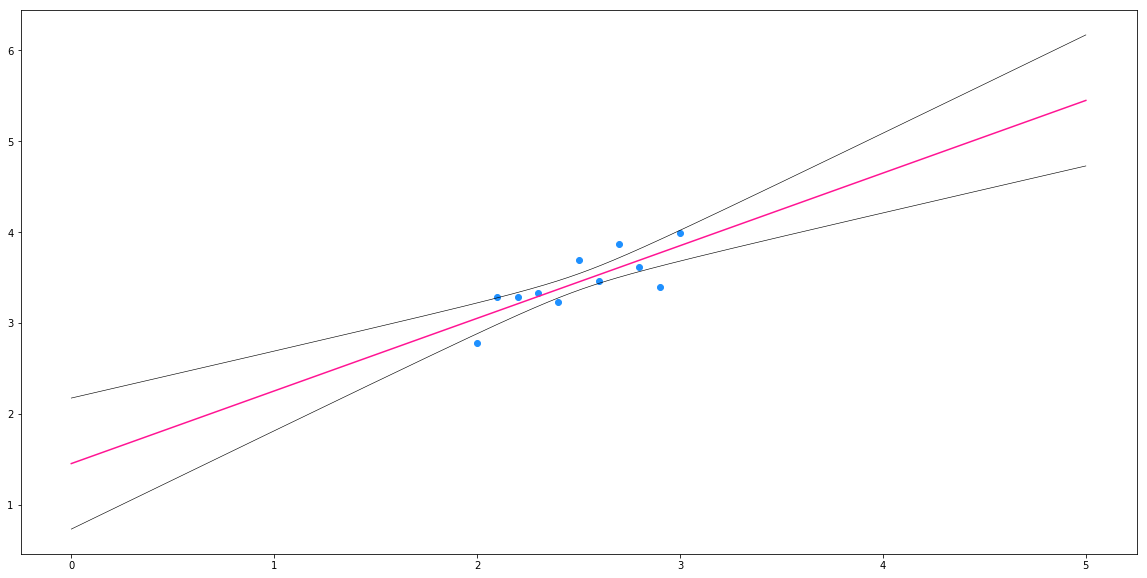

In [3]:
var_y = sigma**2/Delta * (SSX - 2 * xs * SX + xs**2 * N)
sigma_y = np.sqrt(var_y)
banda_sup = recta + sigma_y
banda_inf = recta - sigma_y
ax.plot(xs, banda_sup, color='black', linewidth=0.6)
ax.plot(xs, banda_inf, color='black', linewidth=0.6)
fig

**(e)** Por último, veamos qué habría pasado con las bandas de error si nos hubiéramos "olvidado" de que los estimadores para los parámetros de la recta están correlacionados. En tal caso, habríamos calculado el error en $\hat{y}_a$ como

$$ \Var(\hat{y}_a) = \frac{\sigma^2}{\Delta} (\Sigma x_i^2 + x_a^2 N) $$

obteniendo el siguiente gráfico.

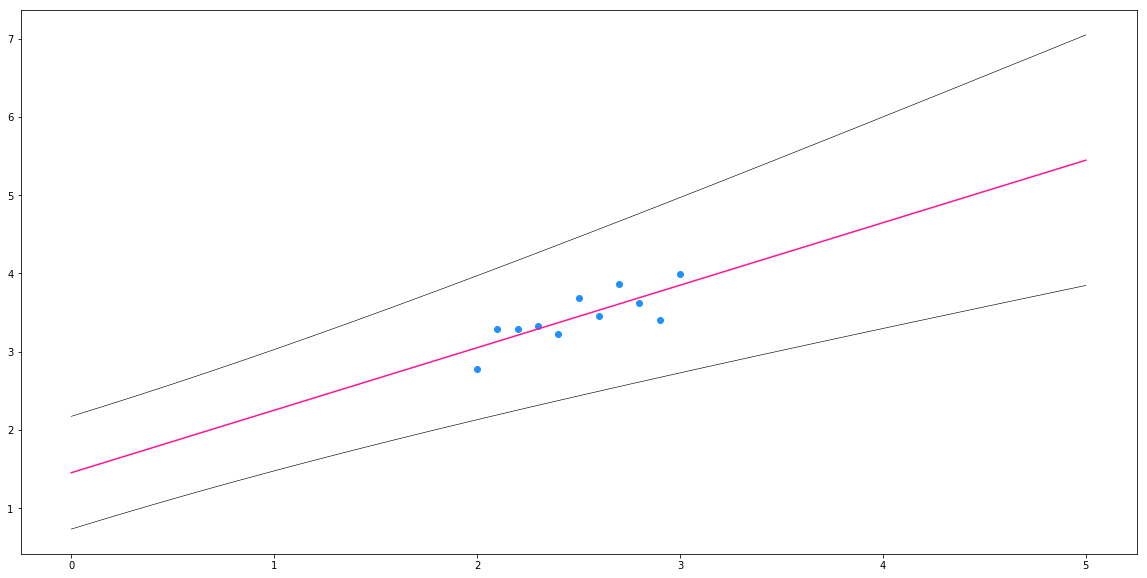

In [4]:
var_mala = sigma**2/Delta * (SSX + xs**2 * N)
sigma_mala = np.sqrt(var_mala)
banda_sup_mala = recta + sigma_mala
banda_inf_mala = recta - sigma_mala

fig2, ax2 = plt.subplots(figsize=(20,10))
ax2.plot(X, Y, 'o', color='dodgerblue')
ax2.plot(xs, recta, color='deeppink')
ax2.plot(xs, banda_sup_mala, color='black', linewidth=0.6)
ax2.plot(xs, banda_inf_mala, color='black', linewidth=0.6)

Observamos que no solamente el error resulta groseramente sobreestimado, sino que además la parte más angosta de la banda de error se encuentra en $x=0$ y esta se ensancha indefinidamente hacia los $x$ positivos, cosa que no refleja correctamente la información que puede obtenerse de los datos (no tiene sentido que la estimación de $y(0)$ sea mejor que la de $y(x_i)$ para cualquiera de los $x_i$ medidos).

# Problema 11


### Enunciado

Verifique los resultados analı́ticos obtenidos en el ı́tem 10d escribiendo un programa que realice la siguiente simulación numérica:

I. para cada xi genere al azar un yi de la distribución gaussiana $N(\hat{a}_1 +\hat{a}_2 x_i , \sigma)$.

II. ajuste una recta a los $(x_i , y_i)$ generados, y prediga el valor $y_a$ para $x_a = 0.5$.

Repita 1000 veces los pasos I.–II., construyendo un histograma con los valores de $y_a$, y dibuje sobre éste la gaussiana con el valor esperado y el error de ya calculado teoricamente en 10d.


### Metodología de resolución

Recordemos que el estimador $\hat{y}_a$ se construye como combinación lineal de los estimadores para $a_1$ y $a_2$, con lo cual cada realización de $\hat{y}_a$ corresponde a un ajuste lineal proveniente de una realización distinta de los datos. Siguiendo al enunciado, elegimos generar los datos $\{y_i\}$ como provenientes de distribuciones gaussianas independientes $N(\mu_i, \sigma)$, i.e. simulamos errores gaussianos independientes ($\sigma = 0.3$).

Lo que haremos entonces generar datos $\{\tilde{y}_i\} \sim N(\hat{a}_1 + \hat{a}_2 x_i)$, asumiendo que el modelo ajustado en el ejercicio previo es correcto (reemplazamos los valores reales $a_1$ y $a_2$ por las estimaciones obtenidas en el Ejercicio 10). Generaremos 1000 realizaciones de este conjunto de variables aleatorias y para cada una de ellas  buscaremos la recta que mejor los ajusta, obteniendo realizaciones de las variables aleatorias $\tilde{a}_1$ y $\tilde{a}_2$. De cada uno de estos ajustes derivaremos una predicción para $y(x=x_a)$; estas predicciones serán realizaciones de la variable aleatoria $\tilde{y}_a = \tilde{a}_1 + \tilde{a}_2 x_a$.

Finalmente haremos un histograma con todas estas predicciones y lo compararemos con la gaussiana $N(\hat{a}_1 + x_a \, \hat{a}_2, \sigma_a)$ donde $\sigma_a = \sigma \sqrt{ (\Sigma x_i^2 - 2 x_a \Sigma x_i + x_a^2 N) \, / \Delta}$. A tal fin, el histograma estará normalizado tal que su área sea unitaria. Se tomará un número de bines lo suficientemente grande como para poder aproximar el error de cada bin como un error poissoniano, i.e. considerar que la variable aleatoria "altura del bin" es aproximadamente poissoniana, con lo cual el error se tomará como la raíz cuadrada de la altura del bin.

En particular, se nos pide fijar $x_a = 0.5$ y se toma el número de bines igual a 40.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Datos del problema
X = [2.00 + 0.1 * i for i in range(11)]
N = len(X)
sigma = 0.3
x_a = 0.5

# Resultados del ajuste de cuadrados mínimos del ejercicio anterior
a_1 = 1.45 #± 0.721 
a_2 = 0.799 #± 0.286 

los_y_a = []

# Por comodidad (y eficiencia) defino ciertas sumatorias que no dependen de y
SX = sum(X)
SSX = sum(x**2 for x in X)
Delta = N * SSX - SX**2


for i in range(1000):
    #Realización de los datos:
    ys = [norm.rvs(loc=(a_1 + a_2 * x), scale=sigma) for x in X]
    
    #Ahora hacemos cuadrados mínimos.
    
    # Por comodidad (y eficiencia) defino ciertas sumatorias
    Sys  = sum(ys)
    SXys = sum(x*y for (x,y) in zip(X,ys))
    
    
    a_1_iter = (SSX * Sys - SX * SXys) / Delta
    a_2_iter = (N * SXys - SX * Sys) / Delta
    #Calculamos el valor de y_a predicho a partir de esta realización:
    y_a_iter = a_1_iter + a_2_iter * x_a
    #Agregamos a la lista de predicciones
    los_y_a.append(y_a_iter)

In [11]:
#Calculamos el histograma con errores poissonianos, sin normalizar aún.
numbines = 40
alturas, bordes = np.histogram(los_y_a, bins=numbines)
ancho = bordes[1]-bordes[0] #Usamos que el ancho es constante
errores = np.sqrt(alturas)

In [12]:
#Normalizamos el histograma tal que su área sea igual a 1.

#Constante de normalización:
c = 1000 * ancho #Usamos que el ancho es constante
# Normalizamos las alturas y los errores de forma que se conserve el
# error relativo:
alturas_norm = alturas / c
errores_norm = errores / c

In [13]:
#Parámetros de la gaussiana contra la que compararemos el histograma
mu_a = a_1 + a_2 * x_a
var_a = sigma**2/Delta * (SSX - 2 * x_a * SX + x_a**2 * N)
sigma_a = np.sqrt(var_a)

#Rango de graficación de la gaussiana:
xs = np.linspace(bordes[0]-1, bordes[-1]+1, num=10000)
#Gráfico de la gaussiana:
gaussiana = 1/(np.sqrt(2*np.pi) * sigma_a) * np.exp(-1/2 * ((xs-mu_a)/sigma_a)**2)

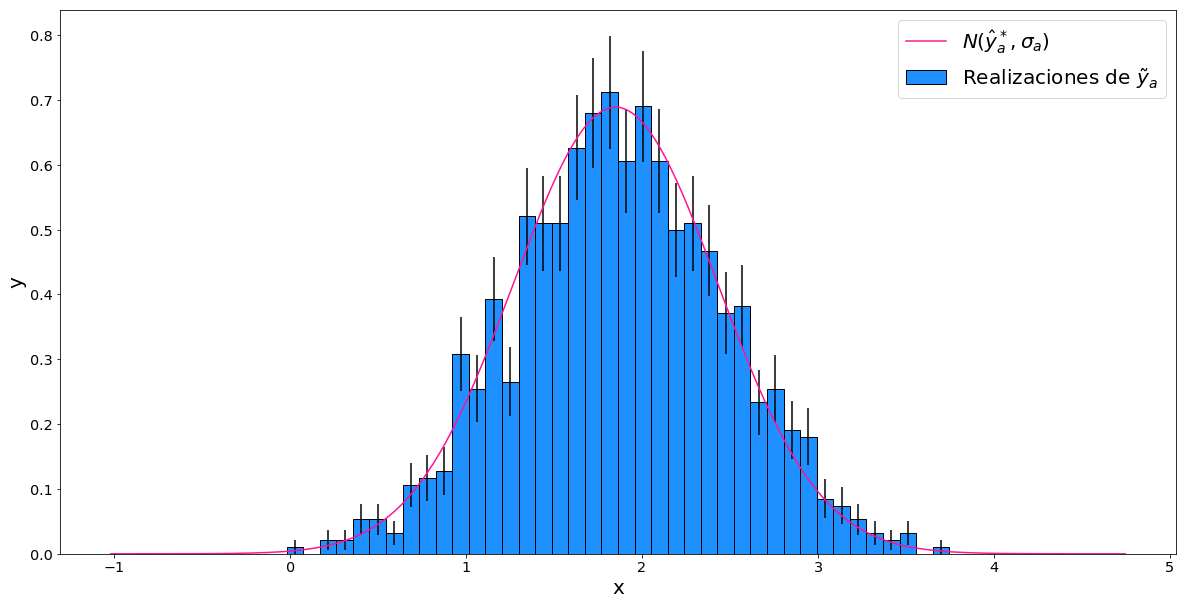

In [28]:
#Graficamos.
params = {'legend.fontsize': 20,
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig3, ax3 = plt.subplots(figsize=(20,10))
ax3.bar(bordes[:-1], alturas_norm, yerr=errores_norm, width=ancho, edgecolor='black',
        color='dodgerblue', align='edge', label='Realizaciones de $\~{y}_a$')
ax3.plot(xs, gaussiana, color='deeppink', label='$N(\hat{y}_a^*, \sigma_a)$')
ax3.set_xlabel('x'), ax3.set_ylabel('y');
ax3.legend();

Observamos un solapamiento razonable entre las barras de error del histograma y la curva gaussiana continua: la mayor parte de las barras se solapan con la misma, pero no todas (el número de bines cuyo error se solapa con la curva es una variable aleatoria binomial con $n=40$, $p=0.68$, con lo cual esperamos que $27 \pm 3$ bines sean tales que su error se solapa con la curva). Es decir que lo que se observa es compatible con la conclusión de que la variable aleatoria generada para construir el histograma está distribuida según la curva gaussiana graficada.

-----------------------------


### Recapitulación y conclusiones

En primer lugar, usando el modelo ajustado a los datos en el Ejercicio 10, predecimos un valor para $y(x_a = 0.5)$. Esto quiere decir que construimos el estimador $\hat{y}_a = \hat{a}_1 + \hat{a}_2 x_a$, cuya desviación estándar está dada por $\sigma_a$, y lo evaluamos en los datos originales, obteniendo una _realización_ $\hat{y}_a^*$ que es a la cual llamamos "predicción". Si se asume que las mediciones $\{y_i\}$ tenían error gaussiano, i.e. $y_i \sim N(a_1 + a_2 x_i, \sigma)$,  entonces $\hat{a}_1$ y $\hat{a}_2$ también serán gaussianas por ser combinación lineal de variables aleatorias gaussianas, y por la misma razón también $\hat{y}_a$ lo será. Es decir que, bajo la suposición de errores gaussianos, el estimador $\hat{y}_a$ para $y(x_a)$ tiene distribución $N(\E[\hat{a}_1 + \hat{a}_2 x_a], \sigma_a) = N(a_1 + a_2 x_a, \sigma_a)$. **Esta no es la distribución que graficamos**: lo que graficamos es

$$N(\hat{y}_a^*, \sigma_a) = N(\hat{a}_1^* + \hat{a}_2^* x_a, \sigma_a)$$

donde $\hat{a}_1^*$ y $\hat{a}_2^*$ son las realizaciones de las variables aleatorias $\hat{a}_1$ y $\hat{a}_2$ obtenidas a partir de los datos del Ejercicio 10. Podríamos decir entonces que **lo que estamos graficando es nuestra mejor estimación de la distribución de $\hat{y}_a$**, bajo la suposición de errores gaussianos. Quizás sea una forma un poco extraña de expresarse, dado que en general lo que se estima son los parámetros y no las distribuciones de los estimadores, pero como la distribución del estimador naturalmente depende del parámetro que estima, en el fondo es equivalente decir que se estima el parámetro a decir que se estima la distribución del estimador.

A continuación, asumimos como correcto al modelo ajustado a los datos en el Ejercicio 10. Es decir que desde este punto en adelante nuestra "realidad de trabajo" no es la ley $y = a_1 + a_2 x$ con $a_1$, $a_2$ desconocidos sino

\begin{equation}
y = \hat{a}_1^* + \hat{a}_2^* x \quad \star
\end{equation}

Generamos datos $\{\tilde{y}_i\}$ aleatorios que fluctúan gaussianamente alrededor de los valores reales $y(x_i)$ (donde "reales" significa dados por $\star$). Es decir, $\tilde{y}_i \sim N(\hat{a}_1^* + \hat{a}_2^* x_i, \sigma)$. Para cada una de estas mediciones simuladas ajustamos una recta por Cuadrados Mínimos, obteniendo una realización de los estimadores $\tilde{a}_1$ y $\tilde{a}_2$, y con ellos predecimos un valor para $y(x_a = 0.5)$ o, lo que es lo mismo, obtenemos una realización del estimador $\tilde{y}_a = \tilde{a}_1 + \tilde{a}_2 x_a$. Este estimador, por un argumento análogo al dado para $\hat{y}_a$, está distribuido según

$$\tilde{y}_a \sim N(\E[\tilde{a}_1 + \tilde{a}_2 x_a]; \tilde{\sigma}_a) = N(\hat{a}_1^* + \hat{a}_2^* x_a, \tilde{\sigma}_a)$$

con $\tilde{\sigma} = \sigma$ pues esta cantidad no depende del valor que adopten los $\{y_i\}$. Por lo tanto 

$$\tilde{y}_a \sim N(\hat{y}_a^*, \sigma_a)$$

y esto es precisamente lo que concluimos al observar que el histograma de realizaciones de $\tilde{y}_a$ y la distribución continua $N(\hat{y}_a^*, \sigma_a)$ coinciden.